## 2do Parcial - Simulación Computacional 2021-I
Agosto 18 de 2020 - Máxima hora de entrega: 2:00 pm 

## 1. (1.6 punto)
Usando el ejemplo de [_Red de Colas.ipynb_](https://colab.research.google.com/drive/1XSceiJ_pRUvQriXhtuNj-AvI3aklmXUE?usp=sharing) visto en clase, haga las siguientes modificaciones para responder las respectivas preguntas.




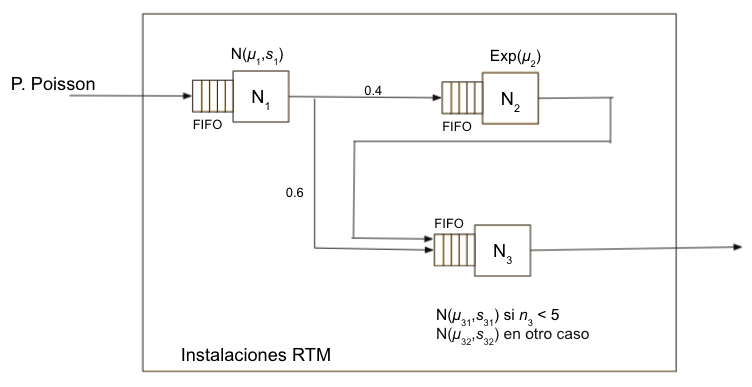


*   Establezca los siguientes parámetros:
$\lambda = 7.0$, $\mu_1 = 2.0$, $s_1 = 1.5$, $\mu_2 = 3.5$, $\mu_{31} = 5.0$, $s_{31} = 3.0$, $\mu_{32} = 3.5$, $s_{32} = 2.0$, y $T = 600$
*   La proporción clientes que pasan del nodo 1 al nodo 2 es del 30%.
*   Deje fijo el valor de la semilla `random.seed(18082021)`

Responda las siguientes preguntas:

a) ¿Cuál es el tiempo medio de los clientes en el sistema?

b) ¿Cuál es el número promedio de clientes para cada uno de los 3 nodos?

c) ¿Cuál es el tiempo transcurrido desde T hasta que el último cliente abandona el sistema?

d) ¿Cuál fue el número máximo de clientes en el sistema durante la simulación?

e) ¿Cuál fue el total de clientes que pasaron por cada uno de los 3 nodos?

f) ¿Cuál fue el total de clientes que pasaron por el sistema?

g) Haga un breve análisis de la simulación de acuerdo con los resultados, las respuestas de la preguntas anteriores y la evolución de las gráficas.


In [ ]:
%matplotlib inline 

import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [ ]:
L = 7.0
mu1 = 2.0
sigma1 = 1.5
mu2 = 3.5
mu31 = 5.0
sigma31 = 3.0
mu32 = 3.5
sigma32 = 2.0

def Llegada_cliente(tsuc):
    global t, n_med_n1, n1, NLL1, LL1, TSuc, mu1, sigma1

    n_med_n1 = n_med_n1 + n1*(tsuc-t)
    n1 = n1 + 1

    LLt.append(tsuc)

    NLL1 = NLL1 + 1
    LL1.append(tsuc)
    t=tsuc

    Y = np.random.exponential(L) 
    if (t+Y) < T:
        TSuc['tLL1'] = t + Y
    if n1 == 1:
        Y = np.random.normal(mu1, sigma1)
        if Y < 0:
            Y = 0
        TSuc['tS1'] = t + Y

def Servicio_nodo1(tsuc):
    global t, n1, n2, n3, n_med_n1, n_med_n2, n_med_n3, NS1, S1, NLL2, NLL3, LL2, LL3, TSuc, mu31, sigma31, mu2
    n_med_n1 = n_med_n1 + n1*(tsuc - t)
    n1 = n1 - 1

    NS1 = NS1 + 1 
    S1.append(tsuc)
    U = np.random.uniform(0,1)
    if U <= 0.3:
        n_med_n2 = n_med_n2 + n2*(tsuc-t)
        n2 = n2 + 1 

        NLL2 = NLL2 + 1
        LL2.append(tsuc)
        if n2 == 1:
            Z = np.random.exponential(mu2) 
            TSuc['tS2'] = tsuc + Z
    else:
        n_med_n3 = n_med_n3 + n3*(tsuc - t)
        n3 = n3 + 1

        NLL3 = NLL3 + 1 
        LL3.append(tsuc)
        if n3 == 1:
            W = np.random.normal(mu31, sigma31)
            if W < 0:
                W = 0
            TSuc['tS3'] = tsuc + W
    t = tsuc
    if n1 > 0:
        S = np.random.normal(mu1, sigma1)
        if S < 0:
            S = 0
        TSuc['tS1'] = tsuc + S

def Servicio_nodo2(tsuc):
    global t, n2, n3, n_med_n2, n_med_n3, NS2, NLL3, LL3, S2, TSuc, mu31, sigma31, mu2
    n_med_n2 = n_med_n2 + n2*(tsuc - t)
    n2 = n2 - 1

    NS2 = NS2 + 1
    S2.append(tsuc)
    if n2 > 0:
        Y = np.random.exponential(mu2)
        TSuc['tS2'] = tsuc + Y
    n_med_n3 = n_med_n3 + n3*(tsuc - t)
    n3 = n3 + 1

    NLL3 = NLL3 + 1
    LL3.append(tsuc)
    if n3 == 1:
        W = np.random.normal(mu31, sigma31)
        if W < 0:
            W = 0
        TSuc['tS3'] = tsuc + W
    t = tsuc

def Servicio_nodo3(tsuc):
    global t, n3, n_med_n3, NS3, S3, TSuc, mu31, sigma31, mu32, sigma32
    n_med_n3 = n_med_n3 + n3*(tsuc - t)
    n3 = n3 - 1

    St.append(tsuc)

    NS3 = NS3 + 1
    S3.append(tsuc)
    if n3 > 0:
        if n3 < 5:
            R = np.random.normal(mu31, sigma31)
        else:
            R = np.random.normal(mu32, sigma32)
        if R < 0:
            R = 0
        TSuc['tS3'] = tsuc + R
    t = tsuc

In [ ]:
M = 999999.0

random.seed(18082021)

at = []
LLt = []
St = []
an1 = []
an2 = []
an3 = []
an = []

T = 600.0

t = tsuc = Tp = 0

NLL1 = NLL2 = NLL3 = NS1 = NS2 = NS3 = n1 = n2 = n3 = 0

n_med_n1 = n_med_n2 = n_med_n3 = 0


TSuc = {"tLL1":M, "tS1":M, "tS2":M, "tS3":M}

LL1 = []
LL2 = []
LL3 = []

S1 = []
S2 = []
S3 = []

X = np.random.exponential(L)
if X > T:
    Tp = t_med_sistema = 0.0
    n_med_n1 = n_med_n2 = n_med_n3 = 0
    exit
else:
    Llegada_cliente(X)
    while (min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']])!=M): #((TSuc['tLL1'] != M)|(TSuc['tS1']!=M)|(TSuc['tS2']!=M)|(TSuc['tS3']!=M)):
        if min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']]) == TSuc['tLL1']:
            tsuc = TSuc['tLL1']
            TSuc['tLL1'] = M
            Llegada_cliente(tsuc) 
        if min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']]) == TSuc['tS1']:
            tsuc = TSuc['tS1']
            TSuc['tS1'] = M
            Servicio_nodo1(tsuc) 
        if min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']]) == TSuc['tS2']:
            tsuc = TSuc['tS2']
            TSuc['tS2'] = M
            Servicio_nodo2(tsuc) 
        if min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']]) == TSuc['tS3']:
            tsuc = TSuc['tS3']
            TSuc['tS3'] = M
            Servicio_nodo3(tsuc)
        at.append(tsuc)
        an1.append(n1)
        an2.append(n2)
        an3.append(n3)
        an.append(n1+n2+n3)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = acumulo3 = 0.0
    
    ind = 0
    while ind < NLL1:
        acumulo1 = acumulo1 + S1[ind] - LL1[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL2:
        acumulo2 = acumulo2 + S2[ind] - LL2[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL3:
        acumulo3 = acumulo3 + S3[ind] - LL3[ind]
        ind = ind + 1

    t_med_sistema = (acumulo1/NLL1) + (0.3*acumulo2/NLL2) + (acumulo3/NLL3)

    n_med_n1 = n_med_n1 / t
    n_med_n2 = n_med_n2 / t
    n_med_n3 = n_med_n3 / t

    exit

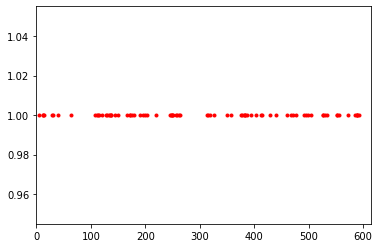

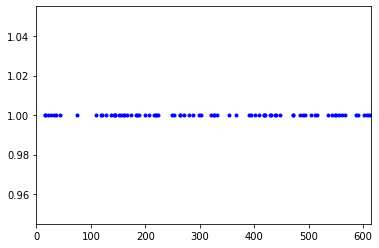

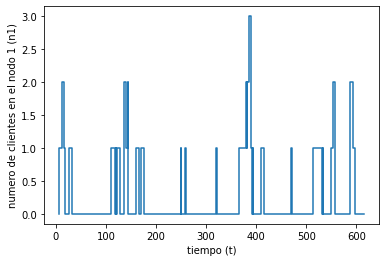

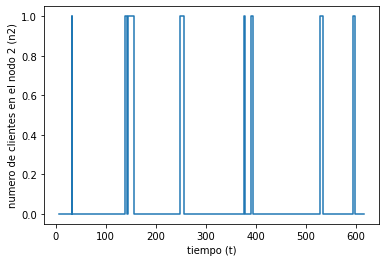

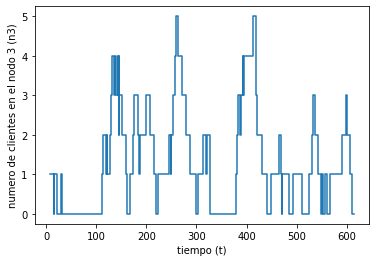

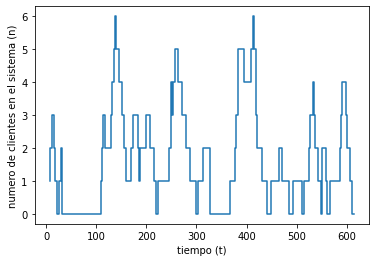

Tiempo medio de los clientes en el sistema (t_med_sistema):  14.50107591326909
Número promedio de clientes en el nodo 1 (n_med_n1):  0.29237720886144236
Número promedio de clientes en el nodo 2 (n_med_n2):  0.04467254486332085
Número promedio de clientes en el nodo 3 (n_med_n3):  1.0374453135864858
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  14.966573856785317
Número máximo de clientes en el sistema:  6
Total de clientes que pasaron por el nodo 1 (n1):  79
Total de clientes que pasaron por el nodo 2 (n2):  18
Total de clientes que pasaron por el nodo 3 (n3):  79
Total de clientes que pasaron por el sistema:  79


In [ ]:
at = np.array(at)
an1 = np.array(an1)
an2 = np.array(an2)
an3 = np.array(an3)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.step(at,an1)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 1 (n1)')
plt.show()

plt.step(at,an2)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 2 (n2)')
plt.show()

plt.step(at,an3)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 3 (n3)')
plt.show()

plt.step(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema (t_med_sistema): ",t_med_sistema)
#print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Número promedio de clientes en el nodo 1 (n_med_n1): ",n_med_n1)
print("Número promedio de clientes en el nodo 2 (n_med_n2): ",n_med_n2)
print("Número promedio de clientes en el nodo 3 (n_med_n3): ",n_med_n3)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el nodo 1 (n1): ",NS1)
print("Total de clientes que pasaron por el nodo 2 (n2): ",NS2)
print("Total de clientes que pasaron por el nodo 3 (n3): ",NS3)
print("Total de clientes que pasaron por el sistema: ",NLL3)

G) Respuesta: en la primera grafica podemos ver la distribucion de los tiempos de llegada al sistema, en la segunda los tiempos de atención de los clientes, podemos ver en la grafica de puntos rojos que el tiempo de llegada esta limitado hasta 600, pero los tiempos de salida puntos azules, su limite es mayor a 600. Tambien en la grafica número de clientes en el nodo uno (n1) vs tiempo, podemos decir que su minimo de atendidos es 1 cliente y su maximo 3 clientes, tuvo intervalos donde estuvo desocupado,la grafica número de clientes en el nodo dos (n2) vs tiempo, podemos decir que su minimo de atendidos es 1 cliente y su maximo 1 cliente, tuvo intervalos donde estuvo desocupado, en comparacion con el nodo 1 este nodo 2 estuvo mas desocupado, la grafica número de clientes en el nodo tres (n3) vs tiempo, podemos decir que su minimo de atendidos es 1 cliente y su maximo 5 clientes, tuvo intervalos donde estuvo desocupado, pero en relación al nodo 1 y 2, este nodo estuvo menos desocupado. En total en el sistema el minimo de clientes fue  1 y maximo 6 clientes. 
Ahora estamos utilizando un valor de landa igual a 7.0 lo que nos quiere decir que el tiempo medio entre llegadas de cada cliente es de (1/7)=0.1428 aproximadamente, podemos comprobar tambien que el total de clientes que pasaron por el nodo 2 (n2):  18, es decir (18/79)=0.2278 aproximadamente; esto corresponde aproximadamente al 30% de la proporción clientes que pasan del nodo 1 al nodo 2.

## 2.  (1.7 punto)
Usando el ejemplo de SimPy de abajo de una conferencia que incluye buffet (refrigerio) con un tiempo máximo de simulación de 4 horas (i.e. 240 minutos) modifique el código para:

**a)** Implementar las medidas de desempeño de hambre promedio y conocimiento promedio.<br>


In [31]:
!pip install simpy

In [32]:
from random import randint
import simpy 

In [33]:
TALKS_PER_SESSION = 4
TALK_LENGTH = 15
BREAK_LENGTH = 15
DURATION_EAT = 3
BUFFET_SLOTS = 2
hunger_promedio = 0
hunger_contador = 0
knowledge_promedio = 0
knowledge_contador = 0

In [34]:
def attendee(env, name, buffet, knowledge=0, hunger=0):
  global hunger_promedio, hunger_contador, knowledge_promedio, knowledge_contador
  while True:
    # Visit talks
    for i in range(TALKS_PER_SESSION):
      knowledge = knowledge + randint(0, 3) / (1 + hunger)
      knowledge_promedio += knowledge
      knowledge_contador += 1
      hunger = hunger + randint(1, 4)
      hunger_promedio += hunger
      hunger_contador +=1
      yield env.timeout(TALK_LENGTH)
    print('El asistente %s terminó las charlas con un conocimiento %.2f y hambre '
    '%.2f.' % (name, knowledge, hunger))

    # Go to buffet
    start = env.now
    with buffet.request() as req:
      yield req | env.timeout(BREAK_LENGTH - DURATION_EAT)
      time_left = BREAK_LENGTH - (env.now - start)
      
      if req.triggered:
        food = min(randint(3, 12), time_left) # Less time -> less food
        yield env.timeout(DURATION_EAT)
        hunger -= min(food, hunger)
        hunger_promedio += hunger
        hunger_contador +=1
        time_left -= DURATION_EAT
        print('El asistente %s terminó de comer con hambre %.2f' %
              (name, hunger))
      else:
        hunger += 1 # Penalty for only taking a look at all the food.
        hunger_promedio += hunger
        hunger_contador +=1
        print('El asistente %s no llegó al buffet :C , el hambre es ahora '
        'at %.2f.' % (name, hunger))
    yield env.timeout(time_left)

In [35]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"-- Hunger promedio = {hunger_promedio/hunger_contador}")
print(f"-- Knowledge promedio = {knowledge_promedio/knowledge_contador}")

El asistente 0 terminó las charlas con un conocimiento 0.70 y hambre 10.00.
El asistente 1 terminó las charlas con un conocimiento 3.64 y hambre 10.00.
El asistente 2 terminó las charlas con un conocimiento 1.00 y hambre 10.00.
El asistente 3 terminó las charlas con un conocimiento 4.18 y hambre 10.00.
El asistente 4 terminó las charlas con un conocimiento 2.96 y hambre 10.00.
El asistente 0 terminó de comer con hambre 7.00
El asistente 1 terminó de comer con hambre 7.00
El asistente 2 terminó de comer con hambre 2.00
El asistente 3 terminó de comer con hambre 7.00
El asistente 4 terminó de comer con hambre 1.00
El asistente 0 terminó las charlas con un conocimiento 1.16 y hambre 19.00.
El asistente 1 terminó las charlas con un conocimiento 4.35 y hambre 17.00.
El asistente 2 terminó las charlas con un conocimiento 2.50 y hambre 13.00.
El asistente 3 terminó las charlas con un conocimiento 4.54 y hambre 18.00.
El asistente 4 terminó las charlas con un conocimiento 4.07 y hambre 9.00.
E

**b)** Comparar y analizar los siguientes escenarios a partir de las medidas de desempeño implementadas indicando cual escenario es mejor:



> 1. Duración de la charla 15 minutos, 4 charlas por sesión, 15 minutos de break, 2 puestos de buffet y 3 minutos por turno para comer en el buffet


In [36]:
TALKS_PER_SESSION = 4 #Charlas por sesión
TALK_LENGTH = 15 #Duración en minutos de la charla
BREAK_LENGTH = 15 #Tiempo de break,descanso después de cada sesión
DURATION_EAT = 3 #Duración en minutos por turno para comer en el buffet
BUFFET_SLOTS = 2 #Cantidad de mesas para comer
hunger_promedio = 0
hunger_contador = 0
knowledge_promedio = 0
knowledge_contador = 0

In [42]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"-- Hunger promedio = {hunger_promedio/hunger_contador}")
print(f"-- Knowledge promedio = {knowledge_promedio/knowledge_contador}")
print(f"Diferencia entre Hunger promedio y Knowledge promedio = {(knowledge_promedio/knowledge_contador) - (hunger_promedio/hunger_contador)}")

El asistente 0 terminó las charlas con un conocimiento 0.51 y hambre 11.00.
El asistente 1 terminó las charlas con un conocimiento 2.75 y hambre 6.00.
El asistente 2 terminó las charlas con un conocimiento 5.58 y hambre 9.00.
El asistente 3 terminó las charlas con un conocimiento 1.00 y hambre 11.00.
El asistente 4 terminó las charlas con un conocimiento 3.45 y hambre 8.00.
El asistente 0 terminó de comer con hambre 8.00
El asistente 1 terminó de comer con hambre 2.00
El asistente 2 terminó de comer con hambre 0.00
El asistente 3 terminó de comer con hambre 5.00
El asistente 4 terminó de comer con hambre 0.00
El asistente 0 terminó las charlas con un conocimiento 0.94 y hambre 17.00.
El asistente 1 terminó las charlas con un conocimiento 4.74 y hambre 11.00.
El asistente 2 terminó las charlas con un conocimiento 10.42 y hambre 9.00.
El asistente 3 terminó las charlas con un conocimiento 1.35 y hambre 12.00.
El asistente 4 terminó las charlas con un conocimiento 7.53 y hambre 9.00.
El a

> 2. Duración de la charla 20 minutos, 4 charlas por sesión, 10 minutos de break, 2 puestos de buffet y 3 minutos por turno para comer en el buffet


In [38]:
TALKS_PER_SESSION = 4 #Charlas por sesión
TALK_LENGTH = 20 #Duración en minutos de la charla
BREAK_LENGTH = 10 #Tiempo de break,descanso después de cada sesión
DURATION_EAT = 3 #Duración en minutos por turno para comer en el buffet
BUFFET_SLOTS = 2 #Cantidad de mesas para comer
hunger_promedio = 0
hunger_contador = 0
knowledge_promedio = 0
knowledge_contador = 0

In [43]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"-- Hunger promedio = {hunger_promedio/hunger_contador}")
print(f"-- Knowledge promedio = {knowledge_promedio/knowledge_contador}")
print(f"Diferencia entre Hunger promedio y Knowledge promedio = {(knowledge_promedio/knowledge_contador) - (hunger_promedio/hunger_contador)}")

El asistente 0 terminó las charlas con un conocimiento 3.33 y hambre 9.00.
El asistente 1 terminó las charlas con un conocimiento 3.93 y hambre 11.00.
El asistente 2 terminó las charlas con un conocimiento 2.40 y hambre 10.00.
El asistente 3 terminó las charlas con un conocimiento 1.00 y hambre 13.00.
El asistente 4 terminó las charlas con un conocimiento 3.70 y hambre 8.00.
El asistente 0 terminó de comer con hambre 0.00
El asistente 1 terminó de comer con hambre 7.00
El asistente 2 terminó de comer con hambre 1.00
El asistente 3 terminó de comer con hambre 8.00
El asistente 4 terminó de comer con hambre 1.00
El asistente 0 terminó las charlas con un conocimiento 6.83 y hambre 12.00.
El asistente 1 terminó las charlas con un conocimiento 4.75 y hambre 17.00.
El asistente 2 terminó las charlas con un conocimiento 2.73 y hambre 13.00.
El asistente 3 terminó las charlas con un conocimiento 1.52 y hambre 19.00.
El asistente 4 terminó las charlas con un conocimiento 5.30 y hambre 10.00.
El

> 3. Duración de la charla 15 minutos, 4 charlas por sesión, 20 minutos de break, 1 puestos de buffet y 3 minutos por turno para comer en el buffet

In [40]:
TALKS_PER_SESSION = 4 #Charlas por sesión
TALK_LENGTH = 15 #Duración en minutos de la charla
BREAK_LENGTH = 20 #Tiempo de break,descanso después de cada sesión
DURATION_EAT = 3 #Duración en minutos por turno para comer en el buffet
BUFFET_SLOTS = 1 #Cantidad de mesas para comer
hunger_promedio = 0
hunger_contador = 0
knowledge_promedio = 0
knowledge_contador = 0

In [44]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"-- Hunger promedio = {hunger_promedio/hunger_contador}")
print(f"-- Knowledge promedio = {knowledge_promedio/knowledge_contador}")
print(f"Diferencia entre Hunger promedio y Knowledge promedio = {(knowledge_promedio/knowledge_contador) - (hunger_promedio/hunger_contador)}")

El asistente 0 terminó las charlas con un conocimiento 1.83 y hambre 8.00.
El asistente 1 terminó las charlas con un conocimiento 3.89 y hambre 13.00.
El asistente 2 terminó las charlas con un conocimiento 1.33 y hambre 10.00.
El asistente 3 terminó las charlas con un conocimiento 4.10 y hambre 7.00.
El asistente 4 terminó las charlas con un conocimiento 4.03 y hambre 8.00.
El asistente 0 terminó de comer con hambre 0.00
El asistente 1 terminó de comer con hambre 4.00
El asistente 2 terminó de comer con hambre 5.00
El asistente 3 terminó de comer con hambre 0.00
El asistente 4 terminó de comer con hambre 3.00
El asistente 0 terminó las charlas con un conocimiento 5.24 y hambre 14.00.
El asistente 1 terminó las charlas con un conocimiento 5.05 y hambre 14.00.
El asistente 2 terminó las charlas con un conocimiento 1.67 y hambre 14.00.
El asistente 3 terminó las charlas con un conocimiento 7.53 y hambre 7.00.
El asistente 4 terminó las charlas con un conocimiento 4.69 y hambre 10.00.
El a

>**Caso 1:**<br>
>Hunger promedio = 8.733333333333333<br>
>Knowledge promedio = 4.236066200657077<br>
>Diferencia entre Hunger promedio y Knowledge promedio = -4.497267132676256<br>
**Caso 2:**<br>
>Hunger promedio = 8.857777777777779<br>
>Knowledge promedio = 4.095578348324177<br>
>Diferencia entre Hunger promedio y Knowledge promedio = -4.762199429453601<br>
**Caso 3:**<br>
>Hunger promedio = 8.543333333333333<br>
>Knowledge promedio = 4.134951384823259<br>
>Diferencia entre Hunger promedio y Knowledge promedio = -4.408381948510074<br>

El mejor caso es el 3, ya que la diferencia entre el hambre promedio y el conocmiento promedio es el mas optimo o cercano a cero entre los tres casos.

**c)** Implemente una configuración que garantice que el conocimiento promedio adquirido por los asistentes sea mayor de 3 y el hambre promedio sea menor a 2.

In [51]:
TALKS_PER_SESSION = 1
TALK_LENGTH = 35
BREAK_LENGTH = 28
DURATION_EAT = 23
BUFFET_SLOTS = 6
hunger_promedio = 0
hunger_contador = 0
knowledge_promedio = 0
knowledge_contador = 0

In [56]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"-- Hunger promedio = {hunger_promedio/hunger_contador}")
print(f"-- Knowledge promedio = {knowledge_promedio/knowledge_contador}")
print(f"Diferencia entre Hunger promedio y Knowledge promedio = {(knowledge_promedio/knowledge_contador) - (hunger_promedio/hunger_contador)}")

El asistente 0 terminó las charlas con un conocimiento 3.00 y hambre 3.00.
El asistente 1 terminó las charlas con un conocimiento 0.00 y hambre 3.00.
El asistente 2 terminó las charlas con un conocimiento 0.00 y hambre 3.00.
El asistente 3 terminó las charlas con un conocimiento 1.00 y hambre 2.00.
El asistente 4 terminó las charlas con un conocimiento 2.00 y hambre 4.00.
El asistente 0 terminó de comer con hambre 0.00
El asistente 1 terminó de comer con hambre 0.00
El asistente 2 terminó de comer con hambre 0.00
El asistente 3 terminó de comer con hambre 0.00
El asistente 4 terminó de comer con hambre 0.00
El asistente 0 terminó las charlas con un conocimiento 5.00 y hambre 3.00.
El asistente 1 terminó las charlas con un conocimiento 1.00 y hambre 4.00.
El asistente 2 terminó las charlas con un conocimiento 3.00 y hambre 3.00.
El asistente 3 terminó las charlas con un conocimiento 1.00 y hambre 1.00.
El asistente 4 terminó las charlas con un conocimiento 2.00 y hambre 4.00.
El asisten

## 3. (1.7 punto)
Abra el modelo del juego de la vida de Conway implementado en la versión Web de NetLogo en el siguiente enlace: http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Computer%20Science/Cellular%20Automata/Life.nlogo, y haga cada paso tomando la respectiva captura de pantalla completa del navegador:

a) Deshabilite el modo Interactivo (quitar candado) para editar el mundo dando click derecho sobre éste y modifíquelo para que la mínima coordenada para parches sea de -10 y la máxima de 10 tanto en eje X como en el eje Y con el parche de centro como origen (0,0) y tamaño de parche de 25.

b) Cree un procedimiento llamado _init-pattern_ que sea llamado al final del procedimiento _setup-blank_ que permita visualizar el siguiente patrón:

<center>

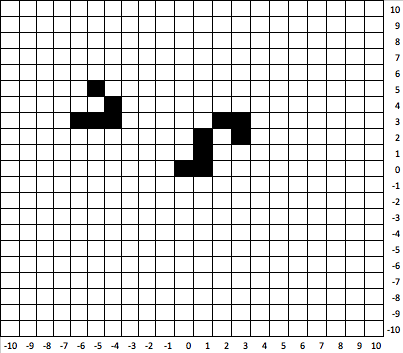
</center>

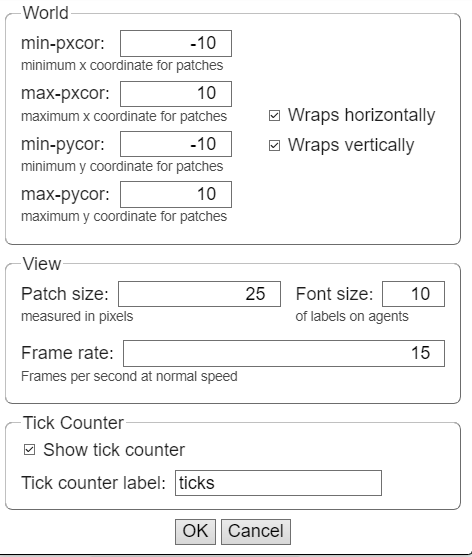


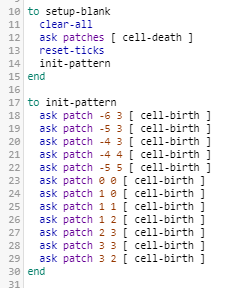

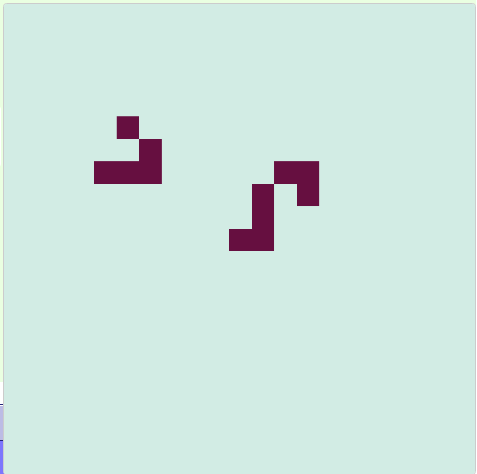

c) Ejecute el comando _go-forever_ y además de la captura de pantalla al final de la iteración 25, indique el respectivo nombre del patrón.



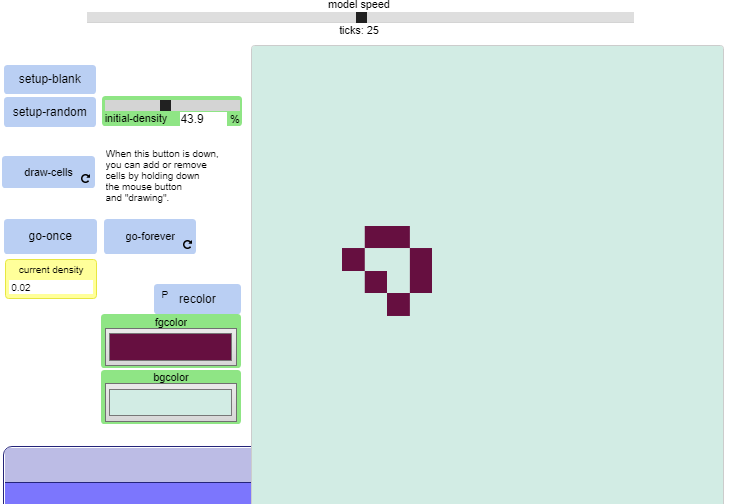

Respuesta: Patron loaf

d)  Si al iniciar el patrón de acuerdo con la imagen del patrón de la izquierda es el _glider_, ¿Qué nombre se le podría dar al patrón estático de la derecha?

Respuesta: Patron Anzuelo
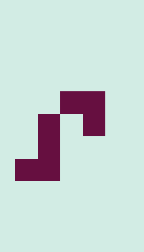

e) Exporte el modelo de NetLogo (esquina superior derecha) el cual descargará el archivo _Life.nlogo_, renombrelo con su código estudiantil (e.g. 160000514.nlogo) y envielo adjunto junto con este archivo de .ipynb